Import library and load data

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [3]:
data = [json.loads(line) for line in open('Home_and_Kitchen.json', 'r')]

In [4]:
home = pd.DataFrame(data)
home['_id'] = home['_id'].map(lambda value : value['$oid'])

Explore data

In [5]:
home

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,5a1325b9741a2384e80424d4,A7J0XOW7DYBBD,0307394530,Allan Mar Cariaso,"[0, 0]",Can't wait to try all the amazing techniques. ...,5.0,Very helpful,1393113600,"02 23, 2014",Home_and_Kitchen,1.0
1,5a1325b9741a2384e80424d1,A28ILV4TOG8BH2,0130350591,ccjensen,"[0, 0]","The butter dish is serving us well, and keepin...",5.0,"Nice looking, and keeps the butter fresh",1300752000,"03 22, 2011",Home_and_Kitchen,1.0
2,5a1325b9741a2384e80424d2,A31B4D7URW4DNZ,0307394530,3Gigi3,"[11, 16]",I anxiously waited for the book I had pre orde...,2.0,Mother of the Bride,1214784000,"06 30, 2008",Home_and_Kitchen,0.0
3,5a1325b9741a2384e80424d3,A2HU0RPDRZZOP1,0307394530,Alexey Leontev,"[0, 0]","Fantastic book, a lot of good, original recipe...",5.0,amazing book,1277337600,"06 24, 2010",Home_and_Kitchen,1.0
4,5a1325b9741a2384e80424d6,A2MGJ4CELCSG10,0307394530,Amber Owens,"[0, 0]","I was so happy with my purchase, the book was ...",5.0,Pleased beyond my expectations!,1234137600,"02 9, 2009",Home_and_Kitchen,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3988477,5a132688741a2384e847b8c9,A1Y0QSRN3Z91C,B00LVJQDBY,"bonita85 ""bonita""","[0, 0]",I purchased this Recliner about 3 weeks ago an...,5.0,"Great chair, quality design!",1405555200,"07 17, 2014",Home_and_Kitchen,1.0
3988478,5a132688741a2384e847b8ca,A2V247ZQT9OJIT,B00LXFN8MS,Natalia,"[0, 0]",I got this as a gift for my niece and she love...,5.0,Too cute,1405900800,"07 21, 2014",Home_and_Kitchen,1.0
3988479,5a132688741a2384e847b8c6,A4XPE5UGK51IA,B00LUVXMX0,Tia Scott,"[0, 0]","Since we were redoing our home, my boyfriend a...",4.0,Simple and Stylish,1405900800,"07 21, 2014",Home_and_Kitchen,1.0
3988480,5a132688741a2384e847b8c8,A2G7RZI15ZPCTH,B00LXFN8MS,Ever,"[0, 0]",This is supposed to be for children but it loo...,5.0,Monkey lovers unite!,1405641600,"07 18, 2014",Home_and_Kitchen,1.0


In [6]:
home = home.drop(columns=['asin','reviewerName','helpful','unixReviewTime','reviewTime','reviewerID'])
home

,_id,reviewText,overall,summary,category,class
0,5a1325b9741a2384e80424d4,Can't wait to try all the amazing techniques. ...,5.0,Very helpful,Home_and_Kitchen,1.0
1,5a1325b9741a2384e80424d1,"The butter dish is serving us well, and keepin...",5.0,"Nice looking, and keeps the butter fresh",Home_and_Kitchen,1.0
2,5a1325b9741a2384e80424d2,I anxiously waited for the book I had pre orde...,2.0,Mother of the Bride,Home_and_Kitchen,0.0
3,5a1325b9741a2384e80424d3,"Fantastic book, a lot of good, original recipe...",5.0,amazing book,Home_and_Kitchen,1.0
4,5a1325b9741a2384e80424d6,"I was so happy with my purchase, the book was ...",5.0,Pleased beyond my expectations!,Home_and_Kitchen,1.0
...,...,...,...,...,...,...
3988477,5a132688741a2384e847b8c9,I purchased this Recliner about 3 weeks ago an...,5.0,"Great chair, quality design!",Home_and_Kitchen,1.0
3988478,5a132688741a2384e847b8ca,I got this as a gift for my niece and she love...,5.0,Too cute,Home_and_Kitchen,1.0
3988479,5a132688741a2384e847b8c6,"Since we were redoing our home, my boyfriend a...",4.0,Simple and Stylish,Home_and_Kitchen,1.0
3988480,5a132688741a2384e847b8c8,This is supposed to be for children but it loo...,5.0,Monkey lovers unite!,Home_and_Kitchen,1.0


In [7]:
home.describe()

,overall,class
count,3.988482e+06,3.988482e+06
mean,4.184940e+00,7.936064e-01
std,1.272904e+00,4.047163e-01
min,1.000000e+00,0.000000e+00
25%,4.000000e+00,1.000000e+00
50%,5.000000e+00,1.000000e+00
75%,5.000000e+00,1.000000e+00
max,5.000000e+00,1.000000e+00


In [8]:
home.isna().sum()

_id           0
reviewText    0
overall       0
summary       0
category      0
class         0
dtype: int64

In [9]:
home['category'].unique()

array(['Home_and_Kitchen'], dtype=object)

In [10]:
home['class'].unique()

array([1., 0.])

In [11]:
home[home.duplicated()]

,_id,reviewText,overall,summary,category,class


In [12]:
home.to_csv('Home_and_Kitchen.csv')

In [13]:
data = pd.read_csv('Home_and_Kitchen.csv')

In [14]:
data

,Unnamed: 0,_id,reviewText,overall,summary,category,class
0,0,5a1325b9741a2384e80424d4,Can't wait to try all the amazing techniques. ...,5.0,Very helpful,Home_and_Kitchen,1.0
1,1,5a1325b9741a2384e80424d1,"The butter dish is serving us well, and keepin...",5.0,"Nice looking, and keeps the butter fresh",Home_and_Kitchen,1.0
2,2,5a1325b9741a2384e80424d2,I anxiously waited for the book I had pre orde...,2.0,Mother of the Bride,Home_and_Kitchen,0.0
3,3,5a1325b9741a2384e80424d3,"Fantastic book, a lot of good, original recipe...",5.0,amazing book,Home_and_Kitchen,1.0
4,4,5a1325b9741a2384e80424d6,"I was so happy with my purchase, the book was ...",5.0,Pleased beyond my expectations!,Home_and_Kitchen,1.0
...,...,...,...,...,...,...,...
3988477,3988477,5a132688741a2384e847b8c9,I purchased this Recliner about 3 weeks ago an...,5.0,"Great chair, quality design!",Home_and_Kitchen,1.0
3988478,3988478,5a132688741a2384e847b8ca,I got this as a gift for my niece and she love...,5.0,Too cute,Home_and_Kitchen,1.0
3988479,3988479,5a132688741a2384e847b8c6,"Since we were redoing our home, my boyfriend a...",4.0,Simple and Stylish,Home_and_Kitchen,1.0
3988480,3988480,5a132688741a2384e847b8c8,This is supposed to be for children but it loo...,5.0,Monkey lovers unite!,Home_and_Kitchen,1.0


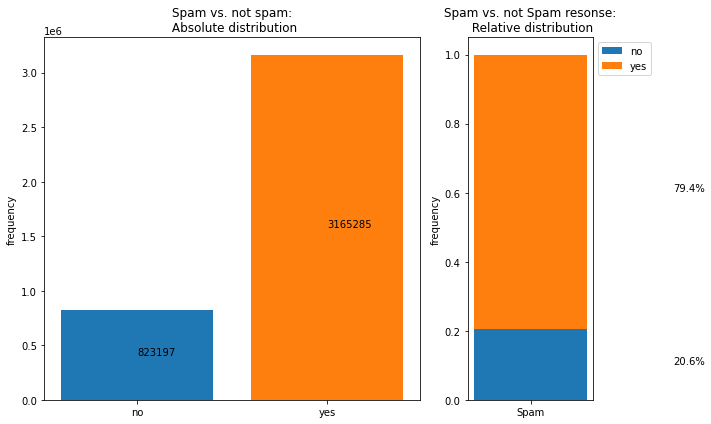

In [15]:
# plot 
keys, counts = np.unique(data['class'], return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(10, 6)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['no', 'yes'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Spam vs. not spam:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['no'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['yes'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Spam'], [counts_norm[0]], label='no')
ax1 = plt.bar(['Spam'], [counts_norm[1]], bottom=counts_norm[0], label='yes')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Spam vs. not Spam resonse:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['class'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['class'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

In [16]:
data['class'].value_counts()

1.0    3165285
0.0     823197
Name: class, dtype: int64

In [17]:
data = data.drop(columns=['Unnamed: 0','_id'])

In [18]:
data['Text']= data['summary'] + ". " + data['reviewText']

In [19]:
data

,reviewText,overall,summary,category,class,Text
0,Can't wait to try all the amazing techniques. ...,5.0,Very helpful,Home_and_Kitchen,1.0,Very helpful. Can't wait to try all the amazin...
1,"The butter dish is serving us well, and keepin...",5.0,"Nice looking, and keeps the butter fresh",Home_and_Kitchen,1.0,"Nice looking, and keeps the butter fresh. The ..."
2,I anxiously waited for the book I had pre orde...,2.0,Mother of the Bride,Home_and_Kitchen,0.0,Mother of the Bride. I anxiously waited for th...
3,"Fantastic book, a lot of good, original recipe...",5.0,amazing book,Home_and_Kitchen,1.0,"amazing book. Fantastic book, a lot of good, o..."
4,"I was so happy with my purchase, the book was ...",5.0,Pleased beyond my expectations!,Home_and_Kitchen,1.0,Pleased beyond my expectations!. I was so happ...
...,...,...,...,...,...,...
3988477,I purchased this Recliner about 3 weeks ago an...,5.0,"Great chair, quality design!",Home_and_Kitchen,1.0,"Great chair, quality design!. I purchased this..."
3988478,I got this as a gift for my niece and she love...,5.0,Too cute,Home_and_Kitchen,1.0,Too cute. I got this as a gift for my niece an...
3988479,"Since we were redoing our home, my boyfriend a...",4.0,Simple and Stylish,Home_and_Kitchen,1.0,Simple and Stylish. Since we were redoing our ...
3988480,This is supposed to be for children but it loo...,5.0,Monkey lovers unite!,Home_and_Kitchen,1.0,Monkey lovers unite!. This is supposed to be f...


In [20]:
text = data[['Text','class','overall','category']]

In [21]:
text

,Text,class,overall,category
0,Very helpful. Can't wait to try all the amazin...,1.0,5.0,Home_and_Kitchen
1,"Nice looking, and keeps the butter fresh. The ...",1.0,5.0,Home_and_Kitchen
2,Mother of the Bride. I anxiously waited for th...,0.0,2.0,Home_and_Kitchen
3,"amazing book. Fantastic book, a lot of good, o...",1.0,5.0,Home_and_Kitchen
4,Pleased beyond my expectations!. I was so happ...,1.0,5.0,Home_and_Kitchen
...,...,...,...,...
3988477,"Great chair, quality design!. I purchased this...",1.0,5.0,Home_and_Kitchen
3988478,Too cute. I got this as a gift for my niece an...,1.0,5.0,Home_and_Kitchen
3988479,Simple and Stylish. Since we were redoing our ...,1.0,4.0,Home_and_Kitchen
3988480,Monkey lovers unite!. This is supposed to be f...,1.0,5.0,Home_and_Kitchen


In [22]:
text.shape

(3988482, 4)

In [23]:
text.isna().sum()

Text        22
class        0
overall      0
category     0
dtype: int64

In [24]:
text = text.dropna(axis = 0)

In [25]:
text.isna().sum()

Text        0
class       0
overall     0
category    0
dtype: int64

In [26]:
X = text[['Text','overall','category']]
y = text['class'] #define feature matrix X and labels y
X_rem, X_sample, y_rem, y_sample = train_test_split(X, y, test_size = 0.005, shuffle = True, stratify=y, random_state = 1234)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.3, random_state = 1234) #split data 70:30

In [27]:
#Helper function to get lemmatizer to return the original word form
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"V": wordnet.VERB,
                "N": wordnet.NOUN,
                "J": wordnet.ADJ,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(raw_string):
    string = re.sub(r"'\w?", " ", raw_string)
    string = re.sub(r"[^a-zA-Z \-]", " ", string)
    #tokenize words
    word_tokens = word_tokenize(string)
    #remove stopwords
    stop_words = set(stopwords.words('english') + ['-', 'us'])
    filtered_tokens = [word.lower() for word in word_tokens if not word.lower() in stop_words]
    #stem the remaining words
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in filtered_tokens]
    stemmed_string = " ".join(stemmed_tokens)
    return stemmed_string

In [28]:
text_data = pd.DataFrame(X_train).reset_index(drop=True)
text_data['Processed Text'] = text_data['Text'].map(lambda raw_string : lemmatize(raw_string))
text_data

,Text,overall,category,Processed Text
0,Recommended by great chefs and tested by cooks...,5.0,Home_and_Kitchen,recommend great chef test cook cooking tool ea...
1,Great pump!. Works perfectly. Happy with my pu...,5.0,Home_and_Kitchen,great pump work perfectly happy purchase thank...
2,Beauty and function!. I saw this pattern onlin...,5.0,Home_and_Kitchen,beauty function saw pattern online corelle sco...
3,Red Neck Wine Glasses. They were wonderful.. u...,5.0,Home_and_Kitchen,red neck wine glass wonderful use wedding toas...
4,Stay away!. the handle on the body is made of ...,1.0,Home_and_Kitchen,stay away handle body make cheap plastic never...
...,...,...,...,...
13955,Bunny can get to the wine!. This is such a nif...,5.0,Home_and_Kitchen,bunny get wine nifty design perfect quite mana...
13956,Tough to turn. The product provides a reasonab...,3.0,Home_and_Kitchen,tough turn product provide reasonable holder t...
13957,"Nice. It looked very nice, and I'm sure it is ...",4.0,Home_and_Kitchen,nice look nice sure expect comforter order cas...
13958,"Works great.. I bought this because our ""Chopp...",5.0,Home_and_Kitchen,work great bought chopper purchase several yea...


In [39]:
text_data['class'] = y_train.reset_index(drop=True)

In [41]:
text_data = text_data[['Text','Processed Text','overall','category','class']]

In [42]:
text_data.to_csv('text_home_kitchen.csv')
text_data[['Processed Text', 'class']].to_csv('spam_home_kitchen.csv')

In [43]:
text_data.head()

,Text,Processed Text,overall,category,class
0,Recommended by great chefs and tested by cooks...,recommend great chef test cook cooking tool ea...,5.0,Home_and_Kitchen,1.0
1,Great pump!. Works perfectly. Happy with my pu...,great pump work perfectly happy purchase thank...,5.0,Home_and_Kitchen,1.0
2,Beauty and function!. I saw this pattern onlin...,beauty function saw pattern online corelle sco...,5.0,Home_and_Kitchen,1.0
3,Red Neck Wine Glasses. They were wonderful.. u...,red neck wine glass wonderful use wedding toas...,5.0,Home_and_Kitchen,1.0
4,Stay away!. the handle on the body is made of ...,stay away handle body make cheap plastic never...,1.0,Home_and_Kitchen,0.0
